In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from cnmf import cNMF

import sys
sys.path.append('../../Code/')
from utils import read_dataset_log
from adjustText import adjust_text
import os

In [2]:
from matplotlib import rcParams, font_manager
import matplotlib

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

label_fontsize = 10
tick_fontsize = 8

In [3]:
figdir = '../../Figures/Components'

In [4]:
params_full = read_dataset_log('Dataset Paths')
params_full.index = params_full['dataset']
params = params_full[params_full['dataset_type']=='discovery']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label,tcat_fn_old
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCA

## Count Tissues

In [9]:
pantissue = pd.read_csv(params.loc['Pan-Tissue', 'metadata_fn'], sep='\t', index_col=0)
pantissue['Organ'].unique()

array(['ILE', 'LNG', 'LLN', 'MLN', 'BMA', 'SKM', 'LIV', 'SPL', 'OME',
       'CAE', 'THY', 'DUO', 'TCL', 'SCL', 'JEJLP', 'JEJEPI'], dtype=object)

Ileum, lung, lung-draining LN, mesenteric LN, bone marrow, skeletal muscle, liver, spleen,
omentum, caecum, thymus, duodenum, transverse colon, sigmoid colon,  jejeunal lamina propria, jejeunum epithelium,





In [5]:
pancancer = pd.read_csv(params.loc['Pan-Cancer', 'metadata_fn'], sep='\t', index_col=0)


In [15]:
(pancancer['cancerType'] + '_' + pancancer['loc']).unique()

array(['BCC_T', 'BCL_T', 'BC_N', 'BC_T', 'ESCA_N', 'ESCA_T', 'FTC_T',
       'HCC_N', 'HCC_T', 'LUNG_N', 'LUNG_T', 'MM_T', 'OV_N', 'OV_T',
       'PACA_T', 'PACA_N', 'RC_N', 'RC_T', 'THCA_N', 'THCA_T', 'UCEC_N',
       'UCEC_T'], dtype=object)

basal cell carcinoma, b-cell lymphoma, Bladder cancer, normal bladder, esophageal cancer, normal esophagus, fallopian tube carcinoma, hepatocellular carcinoma, normal liver, lung cancer, matched normal lung, 
multiple myeloma, ovarian cancer, normal ovary, pancreatic cancer, normal pancreas, renal carcinoma, normal kidney, thyroid carcinoma, normal thyroid, uterine carcinoma, normal uterus

HCC_N overlaps with LIV
LUNG_N overlaps with LNG


In [16]:
16+22-2+2

38

Total tissues:

    - 1. PBMC
    - 2. Synovium
    - 3. Ileum
    - 4. Lung/LUNG_N
    - 5. lung-draining LN
    - 6.  mesenteric LN
    - 7. bone marrow
    - 8. skeletal muscle
    - 9. liver/HCC_N
    - 10. spleen,
    - 11. omentum
    - 12. caecum
    - 13. thymus
    - 14. duodenum
    - 15. transverse colon
    - 16. sigmoid colon
    - 17. jejeunal lamina propria
    - 18. jejeunum epithelium
    - 19. BCC_T
    - 20. BCL_T
    - 21. BC_N
    - 22. BC_T
    - 23. ESCA_N
    - 24. ESCA_T
    - 25. FTC_T
    - 26. HCC_T'
    - 27. LUNG_T
    - 28. MM_T
    - 29. OV_N
    - 30. OV_T
    - 31. PACA_T
    - 32. PACA_N
    - 33. RC_N
    - 34. RC_T
    - 35. THCA_N
    - 36. THCA_T
    - 37. UCEC_N
    - 38. UCEC_t

In [8]:
params.loc['Pan-Cancer', 'sample_col']

'sampleID'

In [11]:
i_col = params.loc['Pan-Cancer', 'individual_col']

In [20]:
pancancer[['cancerType', i_col]].reset_index(drop = True).drop_duplicates()['cancerType'].value_counts()

PACA    26
BCC     11
RC      11
THCA    10
UCEC     9
ESCA     7
HCC      5
LUNG     4
MM       3
BCL      2
BC       2
FTC      1
OV       1
Name: cancerType, dtype: int64

In [23]:
pancancer[pancancer['cancerType']=='LUNG'][i_col].value_counts()

NSCLC.QianqianSong2019.P1    577
NSCLC.QianqianSong2019.P4    551
NSCLC.QianqianSong2019.P3     50
NSCLC.QianqianSong2019.P2     27
Name: patient.uid, dtype: int64

## Sparks stats

In [5]:
dataset = 'Sparks'
sparks_meta = pd.read_csv(params_full.loc[dataset, 'metadata_fn'], sep='\t', index_col=0)

/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
sparks_meta['group'].replace(np.nan, 'control').value_counts()

COVR       194472
HC         128789
control     13478
Name: group, dtype: int64

In [7]:
(pd.crosstab(sparks_meta['alt.subject.id'], sparks_meta['group'].replace(np.nan, 'control'))>0).sum(axis=0)

group
COVR       24
HC         16
control     1
dtype: int64

In [9]:
sparks_meta.shape[0]

336739

In [12]:
sparks_meta.columns

Index(['alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn',
       'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr',
       'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch',
       'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene',
       'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE',
       'nFeature_SCT', 'percent.mt', 'percent.largest.gene',
       'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3', 'n_counts',
       'leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25',
       'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25',
       'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25', 'alt.sample.id'],
      dtype='object')

## Cell and sample count stats

In [5]:
ds_stats = pd.DataFrame(columns = ['n_cells', 'n_individuals', 'n_samples'])

In [6]:
for dataset in params.index:
    print(dataset)
    adata = sc.read(params.loc[dataset, 'processed_forcnmf_fn'])
    metadata = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')

    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']

    if sample_col in adata.obs.columns:
        n_samples = len(adata.obs[sample_col].unique())
    elif sample_col in metadata.columns:
        n_samples = len(metadata.loc[adata.obs.index, sample_col].unique())
    else:
        n_samples = 0

    if individual_col in adata.obs.columns:
        n_individuals = len(adata.obs[individual_col].unique())
    elif individual_col in metadata.columns:
        n_individuals = len(metadata.loc[adata.obs.index, individual_col].unique())
    else:
        n_individuals = 0

    n_cells = adata.shape[0]

    ds_stats = ds_stats.append(pd.DataFrame([[n_cells, n_individuals, n_samples]], 
                                 columns = ds_stats.columns, index = [dataset]))

AMP-RA
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Pan-Cancer
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
TBRU
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
HIV-Vaccine
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
UK-Covid
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
COMBAT
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Pan-Tissue
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
ds_stats

,n_cells,n_individuals,n_samples
AMP-RA,94048,81,81
Pan-Cancer,215035,92,177
TBRU,500089,259,259
HIV-Vaccine,73259,8,24
UK-Covid,273516,121,133
COMBAT,399599,122,138
Pan-Tissue,154314,12,93


In [8]:
ds_stats.to_csv('../../Data/TCAT/CellIndividualCounts_PerDataset.tsv', sep = '\t')

In [1]:
94048+215035+500089+73259+273516+399599+154314

1709860

In [11]:
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,metadata_fn,Processing notebook path,cNMF notebook path,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Analysis/PerDataset/HaoEtAl/...,/data/srlab1/TCAT/Analysis/PerDataset/HaoEtAl/...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,NaN,NaN,...,/data/srlab1/TCAT/Data/PerDataset/COMBAT,35.0,0_15,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/C

In [10]:
params.index

Index(['AMP-RA', 'Pan-Cancer', 'TBRU', 'HIV-Vaccine', 'UK-Covid', 'COMBAT',
       'Pan-Tissue'],
      dtype='object', name='dataset')

In [9]:
cmap = plt.get_cmap('Set2', len(params.index)+1)

for i, dataset in enumerate(params.index):
    print(cmap(i))

(0.4, 0.7607843137254902, 0.6470588235294118, 1.0)
(0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0)
(0.5529411764705883, 0.6274509803921569, 0.796078431372549, 1.0)
(0.9058823529411765, 0.5411764705882353, 0.7647058823529411, 1.0)
(0.6509803921568628, 0.8470588235294118, 0.32941176470588235, 1.0)
(1.0, 0.8509803921568627, 0.1843137254901961, 1.0)
(0.8980392156862745, 0.7686274509803922, 0.5803921568627451, 1.0)


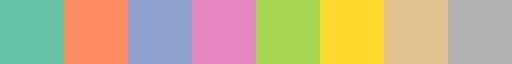

In [13]:
cmap

In [10]:
tissue_types = params['tissue_type'].unique()

markers=['^', 's', 'D']
cmap_dict = dict(zip(params.index,  cmap(range(0, len(params.index)))))

In [12]:
cmap_dict_tissue = dict(zip(tissue_types,  cmap(range(0, len(tissue_types)))))

Synovium
Pan-Tissue
Blood
[Text(81, 94048, 'AMP-RA'), Text(92, 215035, 'Pan-Cancer'), Text(12, 154314, 'Pan-Tissue'), Text(259, 500089, 'TBRU'), Text(8, 73259, 'HIV-Vaccine'), Text(121, 273516, 'UK-Covid'), Text(122, 399599, 'COMBAT')]


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(81.84993711979355, 95925.27466059601, 'AMP-RA'), Text(93.16756825992262, 216912.27466059595, 'Pan-Cancer'), Text(13.098565632929038, 156191.27466059598, 'Pan-Tissue'), Text(258.40197723272263, 501966.27466059575, 'TBRU'), Text(9.187283296206466, 75136.27466059601, 'HIV-Vaccine'), Text(121.93975006286455, 275393.274660596, 'UK-Covid'), Text(122.92113030637417, 401476.2746605959, 'COMBAT')]


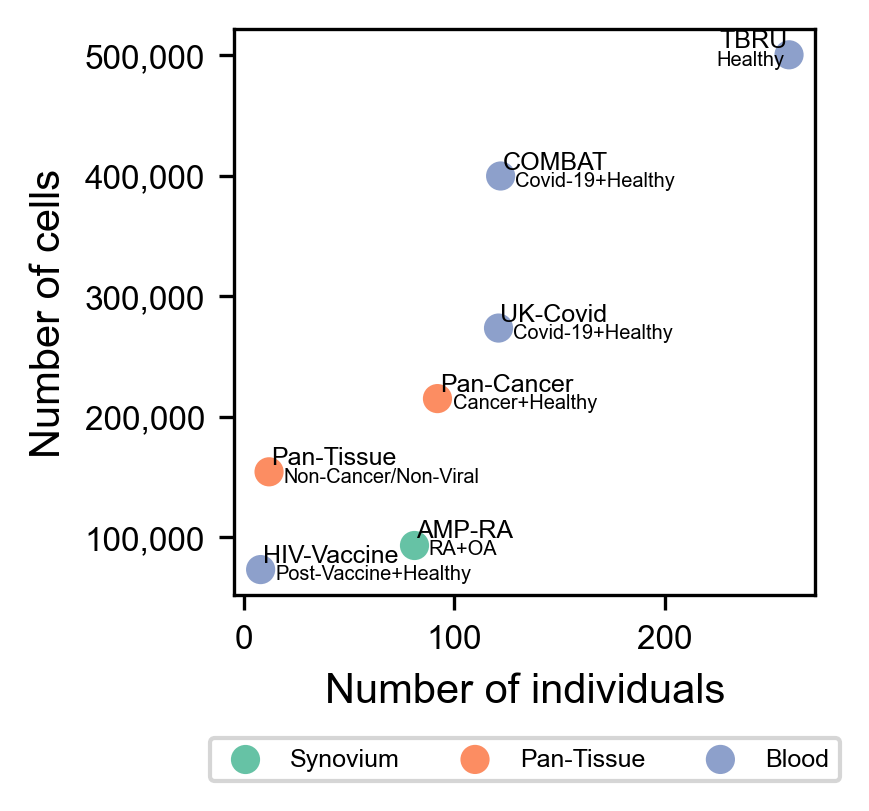

In [20]:
fig, ax = plt.subplots(dpi = 300, figsize = (2.5, 2.5))

texts = []
for j, tissue in enumerate(tissue_types):
    print(tissue)
    tissue_datasets = params[params['tissue_type']==tissue].index
    ax.scatter(y = ds_stats.loc[tissue_datasets, 'n_cells'], 
               x = ds_stats.loc[tissue_datasets, 'n_individuals'], 
               # marker = markers[j], 
               c = [cmap_dict_tissue[tissue]]*len(tissue_datasets), #c = cmap(range(0, len(params.index)))
              label = tissue)
    for dataset in tissue_datasets:
        texts.append(plt.text(
                y = ds_stats.loc[dataset, 'n_cells'], 
                x = ds_stats.loc[dataset, 'n_individuals'], 
                s = dataset, fontsize = 6))
        # ax.text(y = ds_stats.loc[dataset, 'n_cells'], 
        #         x = ds_stats.loc[dataset, 'n_individuals'], 
        #         s = dataset)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.tick_params('both', labelsize = tick_fontsize)
ax.set_xlabel('Number of individuals', fontsize = label_fontsize)
ax.set_ylabel('Number of cells', fontsize = label_fontsize)
print(texts)
adjust_text(texts)

print(texts)
# Add dataset label after adjusting text positions
# Manually determine positions for TBRU, can't get the accurate label position insided of box
context_fontsize = 4.8
for text in texts:
    y = text._y
    x = text._x
    dataset = text.get_text()
    s = params.loc[dataset, 'context_label']
    
    if dataset != 'TBRU':
        plt.text(y = y - 10000, x=x +6,
                 # y =y , x = x,
                 s = s, fontsize =context_fontsize)
    else:
        plt.text(y = (y) - 10000, 
                 x=(x-27) -7, 
                 s = s, fontsize =context_fontsize)
    
plt.legend(loc = 'lower center', ncol = 3, bbox_to_anchor=(.5, -.35), fontsize = tick_fontsize -2)
plt.savefig(os.path.join(figdir, 'Scatterplot_DatasetStats.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Scatterplot_DatasetStats.pdf'), bbox_inches="tight")

plt.show()